<a href="https://colab.research.google.com/github/ujanichakma/AI_LAB_4-1_2025/blob/main/AI_Assignment_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!wget -O data.zip "https://github.com/ujanichakma/AI_LAB_4-1_2025/blob/main/almond_peanut_dataset_marged.zip?raw=true"
!unzip -q data.zip -d .
!ls
!ls data


--2025-10-21 13:21:55--  https://github.com/ujanichakma/AI_LAB_4-1_2025/blob/main/almond_peanut_dataset_marged.zip?raw=true
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/ujanichakma/AI_LAB_4-1_2025/raw/refs/heads/main/almond_peanut_dataset_marged.zip [following]
--2025-10-21 13:21:56--  https://github.com/ujanichakma/AI_LAB_4-1_2025/raw/refs/heads/main/almond_peanut_dataset_marged.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ujanichakma/AI_LAB_4-1_2025/refs/heads/main/almond_peanut_dataset_marged.zip [following]
--2025-10-21 13:21:56--  https://raw.githubusercontent.com/ujanichakma/AI_LAB_4-1_2025/refs/heads/main/almond_peanut_dataset_marged.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.1

In [4]:
!ls


data  data.zip	sample_data


In [5]:
!ls data

test  train


In [6]:
!ls data/train

almond	peanut


In [7]:
!ls data/test

almond	peanut


In [8]:
train_gen = train_datagen.flow_from_directory(
    'data/train',
    target_size=(32,32),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_gen = train_datagen.flow_from_directory(
    'data/train',
    target_size=(32,32),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 540 images belonging to 2 classes.
Found 134 images belonging to 2 classes.


In [9]:
from tensorflow.keras import layers, models

def build_vgg16_like(input_shape=(32,32,3), num_classes=2):
    model = models.Sequential([
        # Block 1
        layers.Conv2D(64, (3,3), activation='relu', padding='same', input_shape=input_shape),
        layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D((2,2)),

        # Block 2
        layers.Conv2D(128, (3,3), activation='relu', padding='same'),
        layers.Conv2D(128, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D((2,2)),

        # Block 3
        layers.Conv2D(256, (3,3), activation='relu', padding='same'),
        layers.Conv2D(256, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D((2,2)),

        # Fully connected
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

model = build_vgg16_like()
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,244,098 (12.38 MB)

 Trainable params: 3,244,098 (12.38 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [11]:
#Train the model
import time

start_train = time.time()
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=30
)
train_time = time.time() - start_train
print(f"\nTraining Time: {train_time:.2f} seconds")


Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


17/17 ━━━━━━━━━━━━━━━━━━━━ 21s 983ms/step - accuracy: 0.5022 - loss: 0.7152 - val_accuracy: 0.5522 - val_loss: 0.6891
Epoch 2/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 17s 982ms/step - accuracy: 0.5554 - loss: 0.6773 - val_accuracy: 0.5522 - val_loss: 0.7369
Epoch 3/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 16s 935ms/step - accuracy: 0.8709 - loss: 0.3528 - val_accuracy: 0.6716 - val_loss: 4.4427
Epoch 4/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 16s 940ms/step - accuracy: 0.9370 - loss: 0.3662 - val_accuracy: 0.9030 - val_loss: 0.2906
Epoch 5/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 16s 955ms/step - accuracy: 0.9991 - loss: 0.0657 - val_accuracy: 0.9552 - val_loss: 0.1732
Epoch 6/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 17s 977ms/step - accuracy: 1.0000 - loss: 4.4533e-04 - val_accuracy: 0.9552 - val_loss: 0.1923
Epoch 7/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 17s 952ms/step - accuracy: 0.9984 - loss: 0.0034 - val_accuracy: 1.0000 - val_loss: 2.0854e-04
Epoch 8/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 16s 962ms/step - accuracy: 0.9984 - loss: 0.0028 - val_accurac

In [12]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_gen = test_datagen.flow_from_directory(
    'data/test',
    target_size=(32,32),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

start_test = time.time()
test_loss, test_acc = model.evaluate(test_gen)
test_time = time.time() - start_test
print(f"\nTesting Time: {test_time:.2f} seconds")
print(f"Test Accuracy: {test_acc*100:.2f}%")


Found 237 images belonging to 2 classes.
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 247ms/step - accuracy: 1.0000 - loss: 3.9131e-05

Testing Time: 2.19 seconds
Test Accuracy: 100.00%


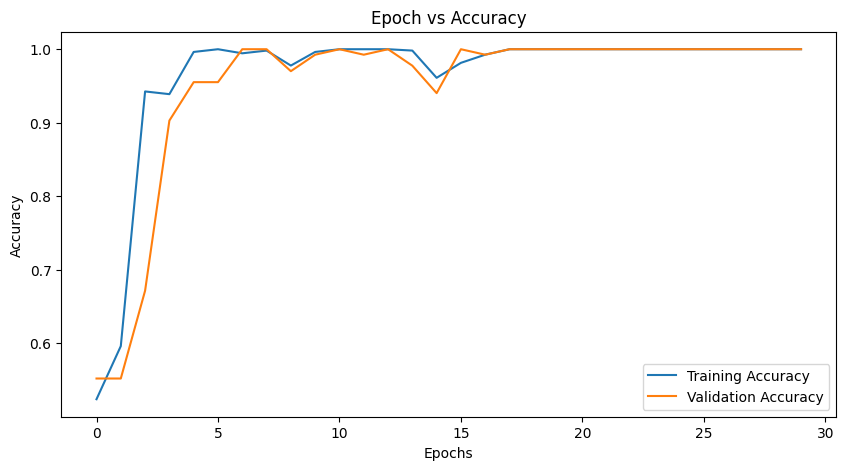

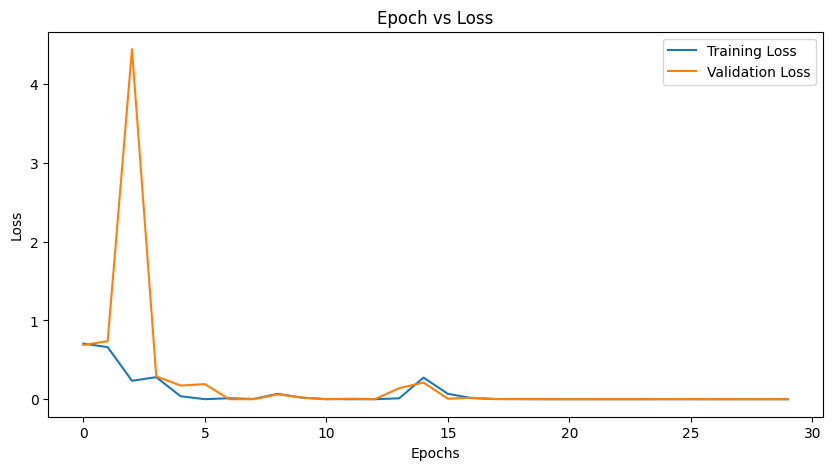

In [13]:
import matplotlib.pyplot as plt

# Epoch vs Accuracy
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Epoch vs Accuracy')
plt.legend()
plt.show()

# Epoch vs Loss
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Epoch vs Loss')
plt.legend()
plt.show()


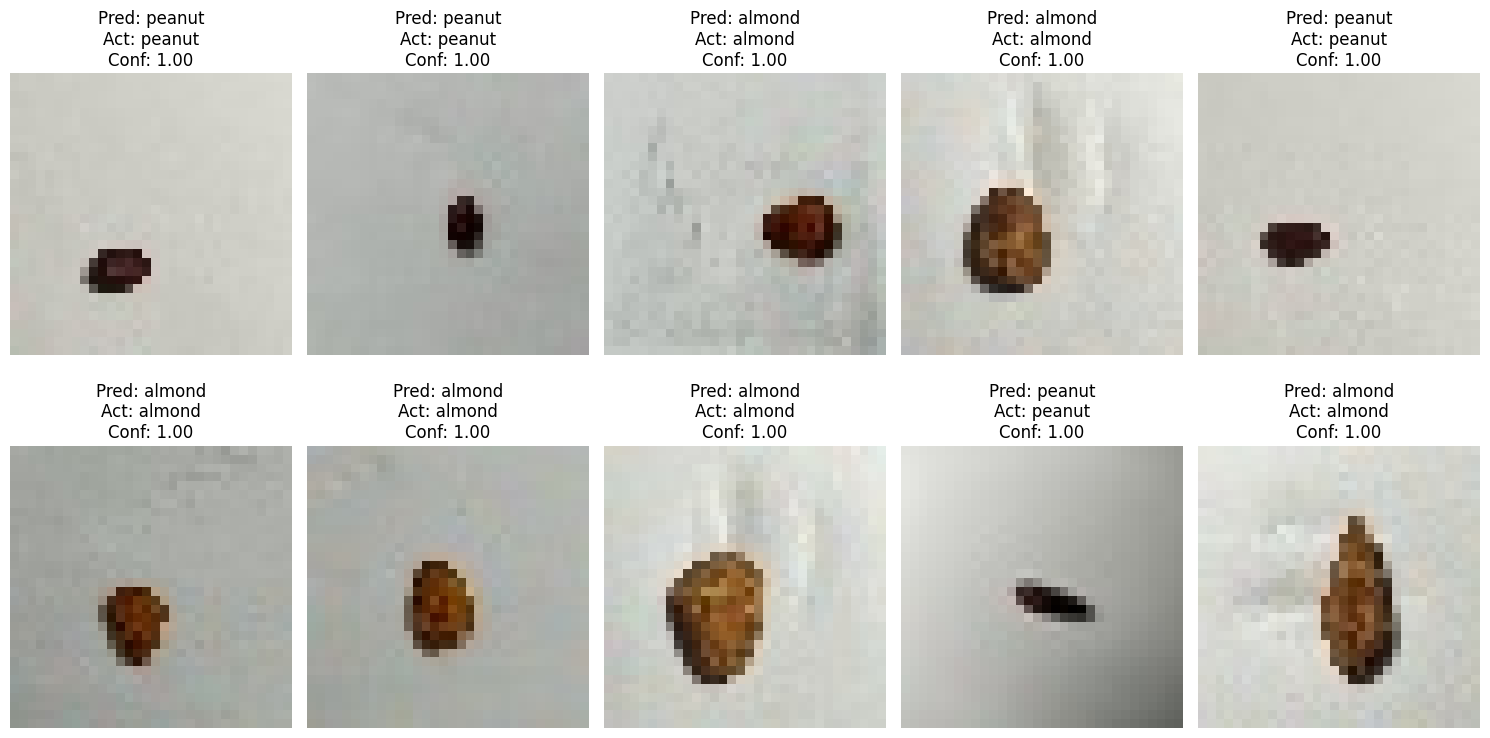

Correct Predictions: 10/10 (100%)


In [14]:
import numpy as np
import random
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import os

class_labels = list(test_gen.class_indices.keys())

# Collect all test images
all_test_images = []
for class_name in os.listdir('data/test'):
    class_path = os.path.join('data/test', class_name)
    if os.path.isdir(class_path):
        all_test_images += [os.path.join(class_path, fname) for fname in os.listdir(class_path)]

# Pick 10 random images
sample_images = random.sample(all_test_images, 10)

plt.figure(figsize=(15, 8))
correct = 0

for i, img_path in enumerate(sample_images):
    img = image.load_img(img_path, target_size=(32,32))
    img_array = image.img_to_array(img)/255.0
    img_array = np.expand_dims(img_array, axis=0)

    pred = model.predict(img_array, verbose=0)
    predicted_class = class_labels[np.argmax(pred)]
    confidence = np.max(pred)

    actual_class = os.path.basename(os.path.dirname(img_path))
    if predicted_class == actual_class:
        correct += 1

    plt.subplot(2,5,i+1)
    plt.imshow(img)
    plt.title(f"Pred: {predicted_class}\nAct: {actual_class}\nConf: {confidence:.2f}")
    plt.axis('off')

plt.tight_layout()
plt.show()
print(f"Correct Predictions: {correct}/10 ({correct*10}%)")


In [15]:
model.save("vgg16_like_almond_peanut.h5")
print("Model saved as vgg16_like_almond_peanut.h5")


Model saved as vgg16_like_almond_peanut.h5
